###### Author: Mohlatlego Nakeng, MIT big data sciences (University of Pretoria,ZA)

###   Model 2:

1. Input : twitter manual suspicious text data.

2. Clean Transformer

3. Vectorisation

4. Fit the pipeline
 * Train data
 * clean-Transformer
 * vetectorisation
 * OneClass SVM

## Text Classification - OneClass Classificaiton
The one-class algorithms are based on recognition since their aim is to recognize data from a particular class, and reject data from all other classes. This is accomplished by creating a boundary that encompasses all the data belonging to the target class within itself, so when a new sample arrives the algorithm only has to check whether it lies within the boundary or outside and accordingly classify the sample as belonging to the target class or the outlier.

Steps:

1. Data Preparation
2. Cleaning and Tokenization
3. Feature Extraction
4. Train One-class classificaiton model
5. Predict one-class on test data

In [1]:
# Load packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.utils import shuffle
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
import string
import spacy
import re
from spacy.lang.en import English
# spacy.load("en_core_web_sm")
parser = English()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("MMA_complaints.csv")

In [3]:
data

,Unnamed: 0,id,source_url,title,overview,outcome,status,platform,asset_urls,asset_text_extracts,created_at
0,0,1813,https://twitter.com/PartyOfAction,NaN,NaN,NaN,Final Edit,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,PARTY OF ACTION - Political Party IEC Register...,2021-09-17 08:21:03
1,1,1815,https://twitter.com/PartyOfAction,NaN,NaN,NaN,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,NaN,2021-09-17 11:21:14
2,2,1821,NaN,NaN,NaN,NaN,Needs More Information,WhatsApp,https://s3-eu-west-1.amazonaws.com/complaints-...,a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...,2021-09-22 06:21:53
3,3,1824,360sheq@gmail.com,Possible Voter Registration Fraud,Person complained that they were registered in...,Not Relevant to Real411. Please contact IEC r...,Resolved - Out of Scope,Other,https://s3-eu-west-1.amazonaws.com/complaints-...,-27820070059\nUse OTP 517392 to proceed with\n...,2021-09-22 14:20:55
4,4,1826,https://twitter.com/mark__rountree/status/1441...,Helen Zille posts Peter de Villiers' announcem...,The video shared by Helen Zille on her Twitter...,Update and clarification: We have been advised...,Resolved,Facebook,https://s3-eu-west-1.amazonaws.com/complaints-...,NaN,2021-09-24 10:32:18
5,5,1827,www.na.co.za,NaN,NaN,NaN,Needs More Information,Other,https://s3-eu-west-1.amazonaws.com/complaints-...,|,2021-09-25 21:10:02
6,6,1828,https://twitter.com/Guerrillaz2/status/1441770...,Twitter: Color determines the level of corrupt...,The complaint is based on a poster by the EFF ...,The poster is clear misinformation because it ...,Resolved,Twitter,https://s3-eu-west-1.amazonaws.com/complaints-...,IT IS NOT\nCORRUPTION IF\nIT IS BLACK\n#REVOLU...,2021-09-25 22:09:54
7,7,1834,https://www.facebook.com/1209371845/posts/1022...,Facebook: Fake ballot papers misleading voters,Complaint is based on a candidate who could po...,The nature of the complaint is unclear. The sa...,Resolved,Facebook,https://s3-eu-west-1.amazonaws.com/complaints-...,SAMPLE BALLOT PAPER\nDISTRICT COUNCIL PARTY VO...,2021-09-30 09:11:57
8,8,1835,https://twitter.com/PHOLELO4ALL/status/1443452...,NaN,NaN,NaN,Final Edit,Twitter,NaN,NaN,2021-09-30 10:42:02
9,9,1841,NaN,Whatsapp: Special vote,The complaint is based on an infographic publi...,\nThe inforgraphic is slightly misleading as t...,Resolved,WhatsApp,https://s3-eu-west-1.amazonaws.com/complaints-...,DA\nSkip the lines\nVote early!\nIf you are a ...,2021-10-02 06:36:21


In [4]:
data1 = data[["status","asset_text_extracts"]]

In [5]:
list(data1["asset_text_extracts"])[0]

'PARTY OF ACTION - Political Party IEC Registere\n4,327 Tweets\nIF YOU DO NOT TAKE AN INTEREST IN THE\nAFFAIRS OF YOUR GOVERNMENT. THEN YOU ARE\nDOOMED TO LIVE UNDER THE RULE OF FOOLS.\nPLATO\n"9 -\nPOA\n...\nFollow\nPARTY OF ACTION - Political Party IEC Registered\n)PartyOfAction\n#Naturallmmunity #COVIDSurvivor #SAvaxrecord #NoLockDowns\n#FreedomOfReligion #NoMedicalApartheid #NoMandatoryVaccines\n#NoMandatoryMasks\no\nSouth Africa\nIII\nJoined July 2020\n1,424 Following 2,105 Followers\nn\nFollowed by Karabo Mokgoko\nand Peter Ndoro | '

In [6]:
data1 = data1.rename(columns={"asset_text_extracts": "tweet"})

In [8]:
data2 = pd.read_csv("data/vaccine_jhb.csv",sep="\t" )
data2.columns
data2 = data2[["tweet"]]

In [9]:
data2['tweet'][0]

"@LadyhawkAnnie The fact that nobody has attempted to steal the vaccine tells me that it has no value. Especially the thieving ANC members. If that does not convince you it's of no value.....nothing ever will."

In [10]:
data3 = pd.read_csv("covid_jhb.csv",sep="\t")
data3 = data3[[ "tweet"]]

In [11]:
#All items in the data1 are confimed misinformation
data1['class'] = 'false-info'

In [12]:
list(data3["tweet"])

['@BigDaddyLiberty @Rob_blogging My husband has been tested 5 times Apr to Jun due to health issues needing hospitalisation (not related to covid). All 5 tests were neg for covid. Today we both took the antibody test. His shows he has antibodies and mine is negative. When did he have it and why didnt I get it?',
 '@Ustangord @drbeen_medical Thank Doc  It will be appreciated. Artemisia Afra or "Lengana" as it\'s known around here is incredibly popular.  It\'s the go to herb that everyone takes to try and fight Covid-19, so it would be interesting to learn about it or similar plants.',
 "@piersmorgan @GMB Trump has taken the spark out of you. You have become low energy after your open letters to him at the beginning of Covid-19. You've gone flat. Your flaccid flogging of Boris being a case in point. You have have said nothing about the Arsenal. 2🏆 in weeks &amp; nothing from u?",
 'Bophelo ke Covid waitse #TheRiver1Magic  https://t.co/EmhhLRyfLt',
 '@fanisarikhotso Lool 2020 iya byala sw

In [13]:
# test_data= data1.append(data2, ignore_index=True)
bigdata = data1.append(data2, ignore_index = True)

In [14]:
bigdata

,status,tweet,class
0,Final Edit,PARTY OF ACTION - Political Party IEC Register...,false-info
1,Resolved,NaN,false-info
2,Needs More Information,a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...,false-info
3,Resolved - Out of Scope,-27820070059\nUse OTP 517392 to proceed with\n...,false-info
4,Resolved,NaN,false-info
...,...,...,...
9744,NaN,@TedPhaladi I agree just go with the flow beca...,NaN
9745,NaN,"And for the love of God, fuck #SAA, use this m...",NaN
9746,NaN,And A VACCINE STRATEGY SHOULD BE ANNOUNCED AND...,NaN
9747,NaN,Where it all start the chines are on with thei...,NaN


In [15]:
bigdata

,status,tweet,class
0,Final Edit,PARTY OF ACTION - Political Party IEC Register...,false-info
1,Resolved,NaN,false-info
2,Needs More Information,a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...,false-info
3,Resolved - Out of Scope,-27820070059\nUse OTP 517392 to proceed with\n...,false-info
4,Resolved,NaN,false-info
...,...,...,...
9744,NaN,@TedPhaladi I agree just go with the flow beca...,NaN
9745,NaN,"And for the love of God, fuck #SAA, use this m...",NaN
9746,NaN,And A VACCINE STRATEGY SHOULD BE ANNOUNCED AND...,NaN
9747,NaN,Where it all start the chines are on with thei...,NaN


In [16]:
bigdata['class'].fillna('unverified', inplace=True)

In [17]:
bigdata['class'].unique()

array(['false-info', 'unverified'], dtype=object)

In [18]:
bigdata['class'].value_counts()

unverified    9727
false-info      22
Name: class, dtype: int64

## Data preparation
Let's take "Misinformation" category as our traning class for one-class classification

##### So let's replace the category labels

* Since "Misinformation" is our traning class let's replace "misinformation" with "1" and other classes/categories with "-1" becuase one-class classification model prediction will be 1 or -1

* We regard  output as "1" is target class, which is misinformation and "-1" is the outlier or not misinformation

In [19]:
# change category labels
bigdata['label'] = bigdata['class'].map({'false-info':1, 'unverified':-1})

In [20]:
bigdata['label'].value_counts()

-1    9727
 1      22
Name: label, dtype: int64

In [21]:
bigdata.shape

(9749, 4)

In [22]:
bigdata

,status,tweet,class,label
0,Final Edit,PARTY OF ACTION - Political Party IEC Register...,false-info,1
1,Resolved,NaN,false-info,1
2,Needs More Information,a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...,false-info,1
3,Resolved - Out of Scope,-27820070059\nUse OTP 517392 to proceed with\n...,false-info,1
4,Resolved,NaN,false-info,1
...,...,...,...,...
9744,NaN,@TedPhaladi I agree just go with the flow beca...,unverified,-1
9745,NaN,"And for the love of God, fuck #SAA, use this m...",unverified,-1
9746,NaN,And A VACCINE STRATEGY SHOULD BE ANNOUNCED AND...,unverified,-1
9747,NaN,Where it all start the chines are on with thei...,unverified,-1


In [23]:
bigdata.isna().values.any()

True

In [24]:
bigdata.isnull().sum()

status    9727
tweet        8
class        0
label        0
dtype: int64

In [25]:
df = bigdata.dropna()

In [26]:
df.isnull().sum()

status    0
tweet     0
class     0
label     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

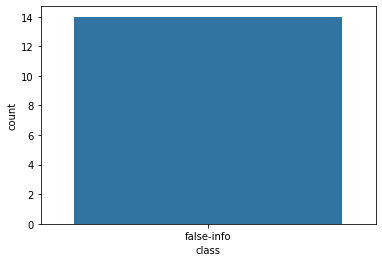

In [27]:
sns.countplot(df['class'])

In [28]:
df.dropna(axis=1, how='all')

,status,tweet,class,label
0,Final Edit,PARTY OF ACTION - Political Party IEC Register...,false-info,1
2,Needs More Information,a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...,false-info,1
3,Resolved - Out of Scope,-27820070059\nUse OTP 517392 to proceed with\n...,false-info,1
5,Needs More Information,|,false-info,1
6,Resolved,IT IS NOT\nCORRUPTION IF\nIT IS BLACK\n#REVOLU...,false-info,1
7,Resolved,SAMPLE BALLOT PAPER\nDISTRICT COUNCIL PARTY VO...,false-info,1
9,Resolved,DA\nSkip the lines\nVote early!\nIf you are a ...,false-info,1
12,Final Edit,THE\nANC\nCALLED\nYOU\nRACISTS\nTHE\nDA\nCALLS...,false-info,1
14,Not Relevant,12:03\n3ul\nVo))\n4G\nS\nLTE\nSign in to Stand...,false-info,1
15,Needs More Information,IVERNMENTA\nETIONS 2021\nDE\nANC\n2021 |,false-info,1


In [29]:
# create a new dataset with only misinformation category data
mis_df = df[df['label'] == 1] #lets us look at our targeted category(false-info)

In [30]:
mis_df

,status,tweet,class,label
0,Final Edit,PARTY OF ACTION - Political Party IEC Register...,false-info,1
2,Needs More Information,a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\n...,false-info,1
3,Resolved - Out of Scope,-27820070059\nUse OTP 517392 to proceed with\n...,false-info,1
5,Needs More Information,|,false-info,1
6,Resolved,IT IS NOT\nCORRUPTION IF\nIT IS BLACK\n#REVOLU...,false-info,1
7,Resolved,SAMPLE BALLOT PAPER\nDISTRICT COUNCIL PARTY VO...,false-info,1
9,Resolved,DA\nSkip the lines\nVote early!\nIf you are a ...,false-info,1
12,Final Edit,THE\nANC\nCALLED\nYOU\nRACISTS\nTHE\nDA\nCALLS...,false-info,1
14,Not Relevant,12:03\n3ul\nVo))\n4G\nS\nLTE\nSign in to Stand...,false-info,1
15,Needs More Information,IVERNMENTA\nETIONS 2021\nDE\nANC\n2021 |,false-info,1


#### create train and test data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# create train and test data
train_text = mis_df['tweet'].tolist()
train_labels = mis_df['label'].tolist()

test_text = bigdata['tweet'].tolist()
test_labels = bigdata['label'].tolist()

##### Data Cleaning and Tokenization

In [33]:
# stop words list
STOPLIST = set(stopwords.words('english') + list()) 
# special character
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”","''", "\n"]

In [34]:
# class for cleaning the text
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
            return {}

def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    return text

In [35]:
# tokenizing the raw text
def tokenizeText(sample):
    
    tokens = parser(sample)
    
    # lemmatization
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    
    # remove stop words and special characters
    tokens = [tok for tok in tokens if tok.lower() not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    
    # only take words with length greater than or equal to 3
    tokens = [tok for tok in tokens if len(tok) >= 3]
    
    # remove remaining tokens that are not alphabetic
    tokens = [tok for tok in tokens if tok.isalpha()]
    
    # stemming of words
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    
    return list(set(tokens))

In [36]:
x = train_text[0]

In [37]:
train_text[0].replace('\n', ' ')

'PARTY OF ACTION - Political Party IEC Registere 4,327 Tweets IF YOU DO NOT TAKE AN INTEREST IN THE AFFAIRS OF YOUR GOVERNMENT. THEN YOU ARE DOOMED TO LIVE UNDER THE RULE OF FOOLS. PLATO "9 - POA ... Follow PARTY OF ACTION - Political Party IEC Registered )PartyOfAction #Naturallmmunity #COVIDSurvivor #SAvaxrecord #NoLockDowns #FreedomOfReligion #NoMedicalApartheid #NoMandatoryVaccines #NoMandatoryMasks o South Africa III Joined July 2020 1,424 Following 2,105 Followers n Followed by Karabo Mokgoko and Peter Ndoro | '

In [38]:
# getting features
vectorizer1 = CountVectorizer()

features1 = vectorizer1.fit_transform(train_text).toarray()
features1.shape

(14, 391)

In [39]:
# getting features
vectorizer = HashingVectorizer(n_features=20,tokenizer=tokenizeText)

features = vectorizer.fit_transform(train_text).toarray()
features.shape

(14, 20)

In [41]:
# OneClassSVM algorithm
One_classSVM_model = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
pipe_clf = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', One_classSVM_model)])

In [42]:
# OneClassSVM algorithm
clf1 = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
pipe_clf1= Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer1), ('clf', One_classSVM_model)])

In [43]:
# fit OneClassSVM model 
pipe_clf.fit(train_text, train_labels)

Pipeline(steps=[('cleanText',
                 <__main__.CleanTextTransformer object at 0x000001C7B080F550>),
                ('vectorizer',
                 HashingVectorizer(n_features=20,
                                   tokenizer=<function tokenizeText at 0x000001C7B0819700>)),
                ('clf', OneClassSVM(gamma=0.1, nu=0.1))])

In [44]:
# fit OneClassSVM model 
pipe_clf1.fit(train_text, train_labels)

Pipeline(steps=[('cleanText',
                 <__main__.CleanTextTransformer object at 0x000001C7B080FD60>),
                ('vectorizer', CountVectorizer()),
                ('clf', OneClassSVM(gamma=0.1, nu=0.1))])

In [45]:
train_text

['PARTY OF ACTION - Political Party IEC Registere\n4,327 Tweets\nIF YOU DO NOT TAKE AN INTEREST IN THE\nAFFAIRS OF YOUR GOVERNMENT. THEN YOU ARE\nDOOMED TO LIVE UNDER THE RULE OF FOOLS.\nPLATO\n"9 -\nPOA\n...\nFollow\nPARTY OF ACTION - Political Party IEC Registered\n)PartyOfAction\n#Naturallmmunity #COVIDSurvivor #SAvaxrecord #NoLockDowns\n#FreedomOfReligion #NoMedicalApartheid #NoMandatoryVaccines\n#NoMandatoryMasks\no\nSouth Africa\nIII\nJoined July 2020\n1,424 Following 2,105 Followers\nn\nFollowed by Karabo Mokgoko\nand Peter Ndoro | ',
 "a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\nHappy Ganesh Chaturthi to\nour Hindu Friends\nWe're looking for team\nmembers to help us make\nour town better & to stop\ncorruption when it comes to\nvoting & counting votes.\nPlease PM me if you're\ninterested.\nPlease use this referral\ncode to show support if\nyou'd like me to be our\ntown's councillor!\nactionsa.app/r/612d03b5\nREPLY | ",
 '-27820070059\nUse OTP 517392 to proceed with\nyour Onlin

In [59]:
# validate OneClassSVM model with test set
preds_test = pipe_clf1.predict(test_text)
preds_test

AttributeError: 'float' object has no attribute 'strip'

In [49]:
test_text

['PARTY OF ACTION - Political Party IEC Registere\n4,327 Tweets\nIF YOU DO NOT TAKE AN INTEREST IN THE\nAFFAIRS OF YOUR GOVERNMENT. THEN YOU ARE\nDOOMED TO LIVE UNDER THE RULE OF FOOLS.\nPLATO\n"9 -\nPOA\n...\nFollow\nPARTY OF ACTION - Political Party IEC Registered\n)PartyOfAction\n#Naturallmmunity #COVIDSurvivor #SAvaxrecord #NoLockDowns\n#FreedomOfReligion #NoMedicalApartheid #NoMandatoryVaccines\n#NoMandatoryMasks\no\nSouth Africa\nIII\nJoined July 2020\n1,424 Following 2,105 Followers\nn\nFollowed by Karabo Mokgoko\nand Peter Ndoro | ',
 nan,
 "a\n21% I 6:52\nNaeem Patel\n5\nminutes.ag9go\nHappy Ganesh Chaturthi to\nour Hindu Friends\nWe're looking for team\nmembers to help us make\nour town better & to stop\ncorruption when it comes to\nvoting & counting votes.\nPlease PM me if you're\ninterested.\nPlease use this referral\ncode to show support if\nyou'd like me to be our\ntown's councillor!\nactionsa.app/r/612d03b5\nREPLY | ",
 '-27820070059\nUse OTP 517392 to proceed with\nyour

In [50]:
bigdata['class'].count()

9749

In [51]:
results = confusion_matrix(test_labels, preds_test) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(test_labels, preds_test)) 
print('Report : ')
print(classification_report(test_labels, preds_test)) 

ValueError: Found input variables with inconsistent numbers of samples: [9749, 14]

In [52]:
results = confusion_matrix(test_labels, preds_test1) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(test_labels, preds_test1)) 
print('Report : ')
print(classification_report(test_labels, preds_test1)) 

NameError: name 'preds_test1' is not defined

In [53]:
# let's take random text from dataset
test_text[4]

nan

In [54]:
# check actual category
test_labels[4]

1

In [55]:
text_sus = []
for index in preds_test1:
    if index == 1:
        text = "misinformation"
    else:
         text = "Normal"
    text_sus.append(text)

bigdata["category"] = text_sus

NameError: name 'preds_test1' is not defined

In [56]:
sns.countplot(bigdata['category'])

KeyError: 'category'

In [57]:
bigdata['class'].value_counts()

unverified    9727
false-info      22
Name: class, dtype: int64

In [58]:

(bigdata
 .groupby(['class', 'category'])
 .size()
 .unstack()
 .plot.bar()
)

KeyError: 'category'

In [ ]:
(bigdata
 .groupby([ 'category', 'class'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)


In [ ]:
bigdata

In [ ]:
mis = bigdata[bigdata['category'] == "misinformation"]

In [ ]:
mis

#### Test on suspcious data

In [ ]:
sus = pd.read_csv("suspicious.csv")

In [ ]:
sus

In [ ]:
sns.countplot(sus['category'])

In [ ]:
# create train and test data
test_sus = sus['tweet'].tolist()

In [ ]:
# validate OneClassSVM model with test set
sus_pred = pipe_clf.predict(test_sus)
sus_pred

In [ ]:
text_suss = []
for index in sus_pred:
    if index == 1:
        text = "misinformation"
    else:
         text = "Normal"
    text_suss.append(text)

sus["class"] = text_suss

In [ ]:
sus

In [ ]:
sus.columns

In [ ]:
(sus
 .groupby([ 'category', 'class'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)

In [ ]:
sus['class'].value_counts()

In [ ]:
(sus
 .groupby([ 'category','class'])
 .size()
 .unstack()
 .plot.bar()
)

In [ ]:
sus[sus['class'] == "misinformation"]

In [ ]:
(sus['category']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('Number of normal tweets against misinformation')
)

In [ ]:
(sus['class']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('Number of normal tweets against misinformation')
)